In [1]:
from statsbombpy import sb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import warnings
warnings.filterwarnings('ignore')


In [2]:
competitions = sb.competitions()
#print(competitions)

In [3]:
matches = sb.matches(competition_id=37, season_id = 90)
#print(matches)

In [4]:
events = sb.events(match_id=3764238) #this is the 130th game, West Ham United LFC vs Arsenal WFC
#print(events.columns)
#print(events)

In [5]:
shots = events[['shot_statsbomb_xg','timestamp', 'team', 'location', 'shot_outcome', 'shot_end_location']].dropna()
#print(shots)

In [6]:
shots_arsenal = shots.loc[shots['team']== 'Arsenal WFC']
shots_arsenal_goal = shots_arsenal.loc[shots_arsenal['shot_outcome']=='Goal']
shots_arsenal_miss = shots_arsenal.loc[shots_arsenal['shot_outcome']!='Goal']
#print(shots_arsenal_miss)

shots_westham = shots.loc[shots['team']== 'West Ham United LFC']
shots_westham_goal = shots_westham.loc[shots_westham['shot_outcome']=='Goal']
shots_westham_miss = shots_westham.loc[shots_westham['shot_outcome']!='Goal']
#print(shots_westham_goal)


In [7]:
#loc_arsenal = pd.DataFrame(shots_arsenal['location'].to_list(),columns=['x1','y1'])
shots_arsenal_goal['start_loc_x'] = shots_arsenal_goal.location.apply(lambda x: x[0])
shots_arsenal_goal['start_loc_y'] = shots_arsenal_goal.location.apply(lambda x: x[1])

shots_arsenal_goal['end_loc_x'] = shots_arsenal_goal.shot_end_location.apply(lambda x: x[0])
shots_arsenal_goal['end_loc_y'] = shots_arsenal_goal.shot_end_location.apply(lambda x: x[1])

shots_arsenal_miss['start_loc_x'] = shots_arsenal_miss.location.apply(lambda x: x[0])
shots_arsenal_miss['start_loc_y'] = shots_arsenal_miss.location.apply(lambda x: x[1])

shots_arsenal_miss['end_loc_x'] = shots_arsenal_miss.shot_end_location.apply(lambda x: x[0])
shots_arsenal_miss['end_loc_y'] = shots_arsenal_miss.shot_end_location.apply(lambda x: x[1])
#print(loc_arsenal)

#loc_westham = pd.DataFrame(shots_westham['location'].to_list(),columns=['x','y'])
shots_westham_goal['start_loc_x'] = shots_westham_goal.location.apply(lambda x: x[0])
shots_westham_goal['start_loc_y'] = shots_westham_goal.location.apply(lambda x: x[1])

shots_westham_goal['end_loc_x'] = shots_westham_goal.shot_end_location.apply(lambda x: x[0])
shots_westham_goal['end_loc_y'] = shots_westham_goal.shot_end_location.apply(lambda x: x[1])

shots_westham_miss['start_loc_x'] = shots_westham_miss.location.apply(lambda x: x[0])
shots_westham_miss['start_loc_y'] = shots_westham_miss.location.apply(lambda x: x[1])

shots_westham_miss['end_loc_x'] = shots_westham_miss.shot_end_location.apply(lambda x: x[0])
shots_westham_miss['end_loc_y'] = shots_westham_miss.shot_end_location.apply(lambda x: x[1])
#print(shots_arsenal_miss)

In [8]:
def calculate_distance('start_loc_x','end_loc_x','start_loc_y','end_loc_y'):
    distance = np.sqrt((end_loc_x-start_loc_x)**2 + (end_loc_y-start_loc_y)**2)
    return distance
calculate_distance(shots_westham_miss)

SyntaxError: invalid syntax (780998013.py, line 1)

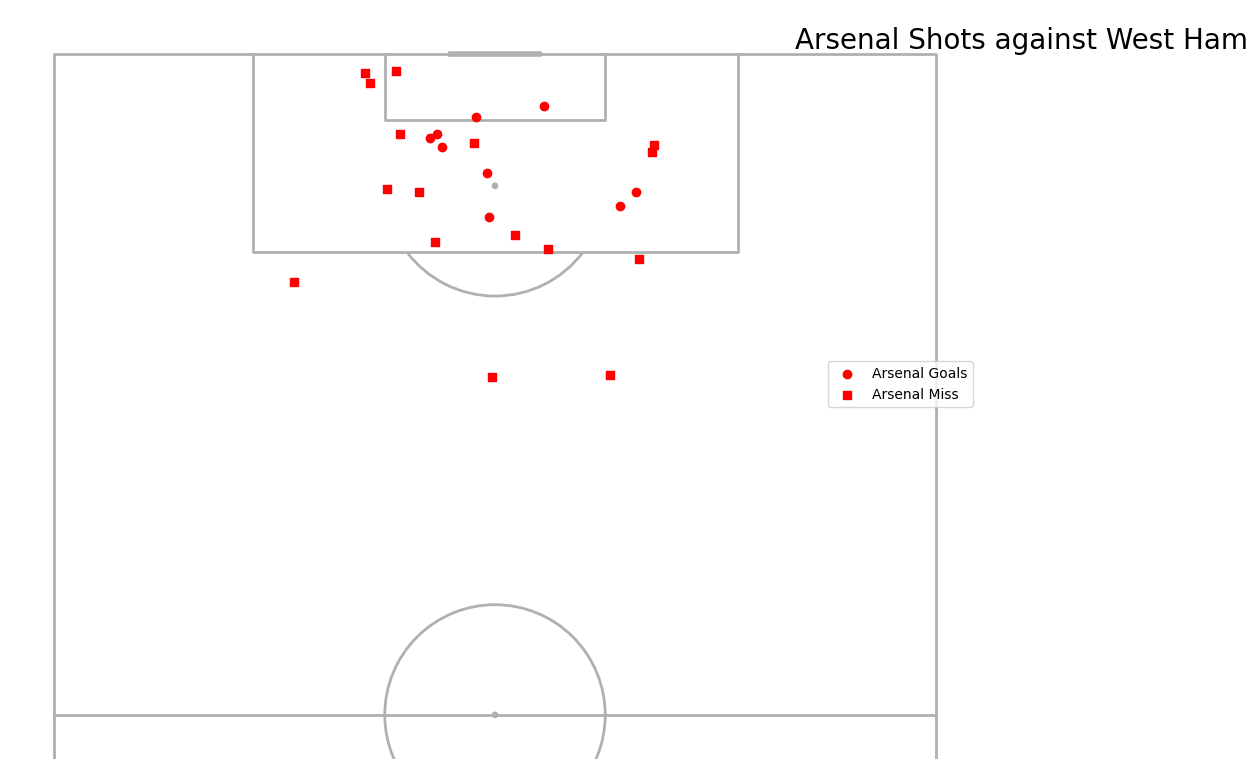

In [9]:
pitch = VerticalPitch(half= True)
fig, ax = pitch.draw(figsize=(10,8))
#ARSENAL
                   #SIZE: s=shots_arsenal['shot_statsbomb_xg']*100+100, 
                   #COLOURMAP: cmap='RdYlGn', c=shots_arsenal['shot_statsbomb_xg']
sc = pitch.scatter(shots_arsenal_goal['start_loc_x'], shots_arsenal_goal['start_loc_y'], 
                   c= 'red',
                   ax=ax,
                  label= 'Arsenal Goals')
sc = pitch.scatter(shots_arsenal_miss['start_loc_x'], shots_arsenal_miss['start_loc_y'], 
                   c= 'red', marker = 's',
                   ax=ax,
                  label= 'Arsenal Miss')
fig.text(00.8,0.92, 'Arsenal Shots against West Ham', size = 20, ha = 'left')         
ax.legend()


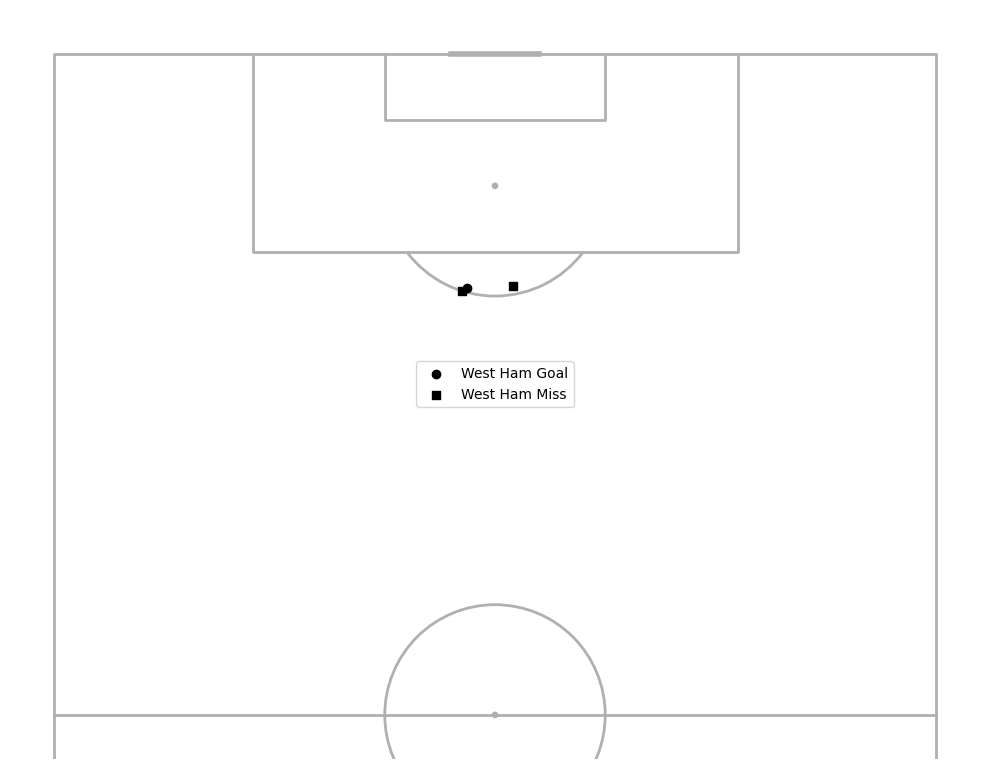

In [10]:
pitch = VerticalPitch(half= True)
fig, ax = pitch.draw(figsize=(10,8))
#WESTHAM
sc = pitch.scatter(shots_westham_goal['start_loc_x'], shots_westham_goal['start_loc_y'], 
                   c= 'black',
                   ax=ax,
                  label = 'West Ham Goal')     
sc = pitch.scatter(shots_westham_miss['start_loc_x'], shots_westham_miss['start_loc_y'], 
                   c = 'black', marker = 's',
                   ax=ax,
                  label = 'West Ham Miss')            
ax.legend()
